In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
columns=['X','Y','class']

In [10]:
df = pd.read_csv(r'F:\ML\100 days ml\practice\data\ushape.csv',header=None)
df.columns=columns

In [11]:
df.head()

,X,Y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


In [13]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

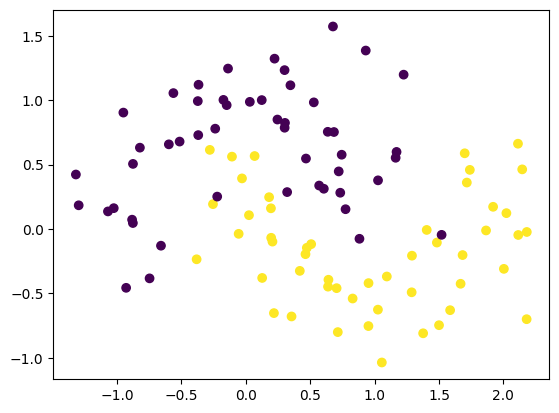

In [16]:
plt.scatter(x.values[:,0],x.values[:,1],c=y)

In [17]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x,y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


c:\Users\Gargi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

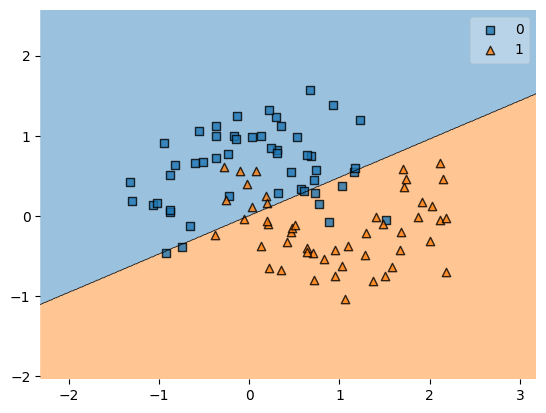

In [26]:

from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x.values, y.astype('int').values, lr, legend=1)

In [28]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(lr,x,y,scoring='accuracy',cv=10))

0.8300000000000001

In [29]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3,include_bias=False)
x_trf=poly.fit_transform(x)

In [30]:
np.mean(cross_val_score(lr,x_trf,y,scoring='accuracy',cv=10))

0.9

In [31]:
def plot_decision_boundary(X,y,degree=1):
    
    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)
    
    clf = LogisticRegression()
    clf.fit(X_trf,y)
    
    accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))
    
    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)
    
    input_array=np.array([XX.ravel(),YY.ravel()]).T

    labels=clf.predict(poly.transform(input_array))
    
    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))

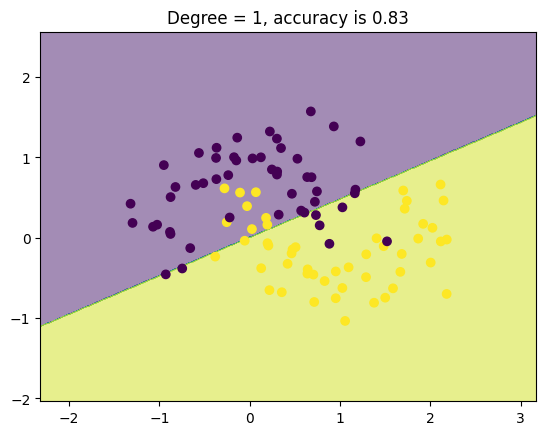

In [33]:
plot_decision_boundary(x.values,y.values)

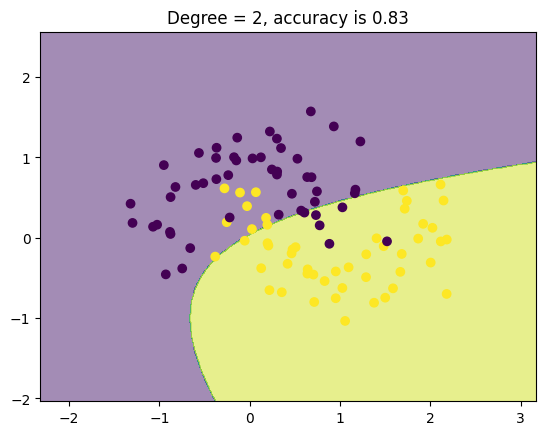

In [34]:
plot_decision_boundary(x.values,y.values,2)

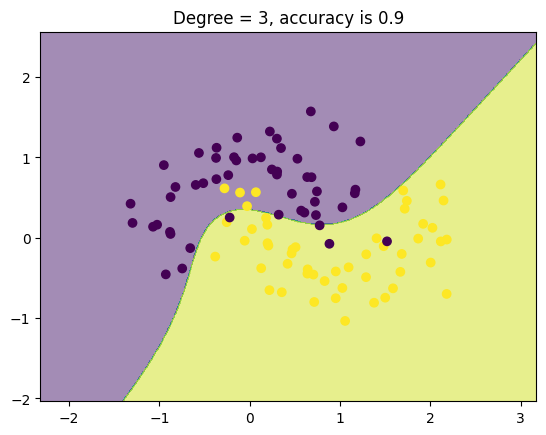

In [35]:
plot_decision_boundary(x.values,y.values,3)

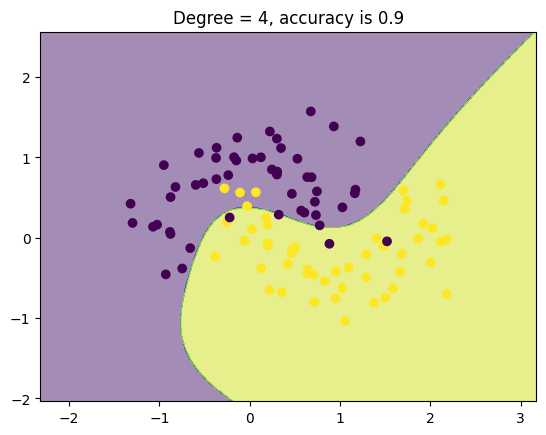

In [36]:
plot_decision_boundary(x.values,y.values,4)

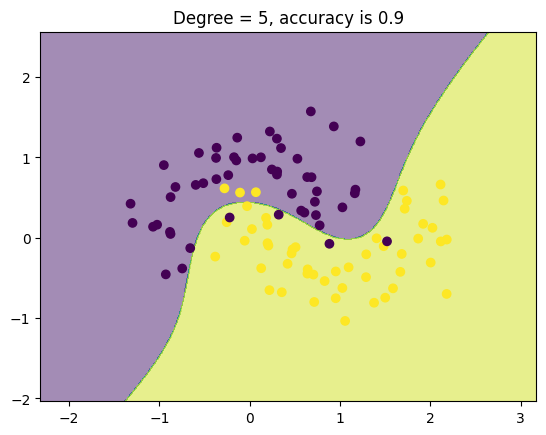

In [37]:
plot_decision_boundary(x.values,y.values,5)

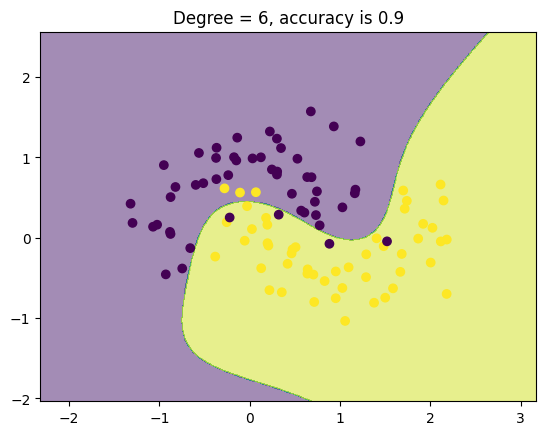

In [38]:
plot_decision_boundary(x.values,y.values,6)